In [1]:
# dependencies import
from common_dependencies import *

from matplotlib.patches import Polygon as mplPolygon
from shapely.geometry import Polygon as shPolygon
from shapely.ops import unary_union

In [2]:
RUN = 1
MODEL_VER = '03'
MODEL_NUM = '02'

PATH_TO_DRAWING_DATA = f'data/Drawing data/Run{RUN}'

df_dict = {}
ref = True

for name in os.listdir(PATH_TO_DRAWING_DATA):
    res = re.match(f'(model_id=v{MODEL_VER}n{MODEL_NUM}).*', name)
    if not res is None: 
        if ref:
            df_dict[f'REFERENCE RUN{RUN} ' + '_'.join(res[0].split('_')[:2])] = \
                pd.read_excel(PATH_TO_DRAWING_DATA+'/'+res[0], sheet_name='orig_reference', index_col=0, dtype=np.float64)
            ref = False
        df_dict[f'PREDICTION RUN{RUN} ' + res[0].split('.')[0]] = \
            pd.read_excel(PATH_TO_DRAWING_DATA+'/'+res[0], sheet_name='orig_res', index_col=0, dtype=np.float64)

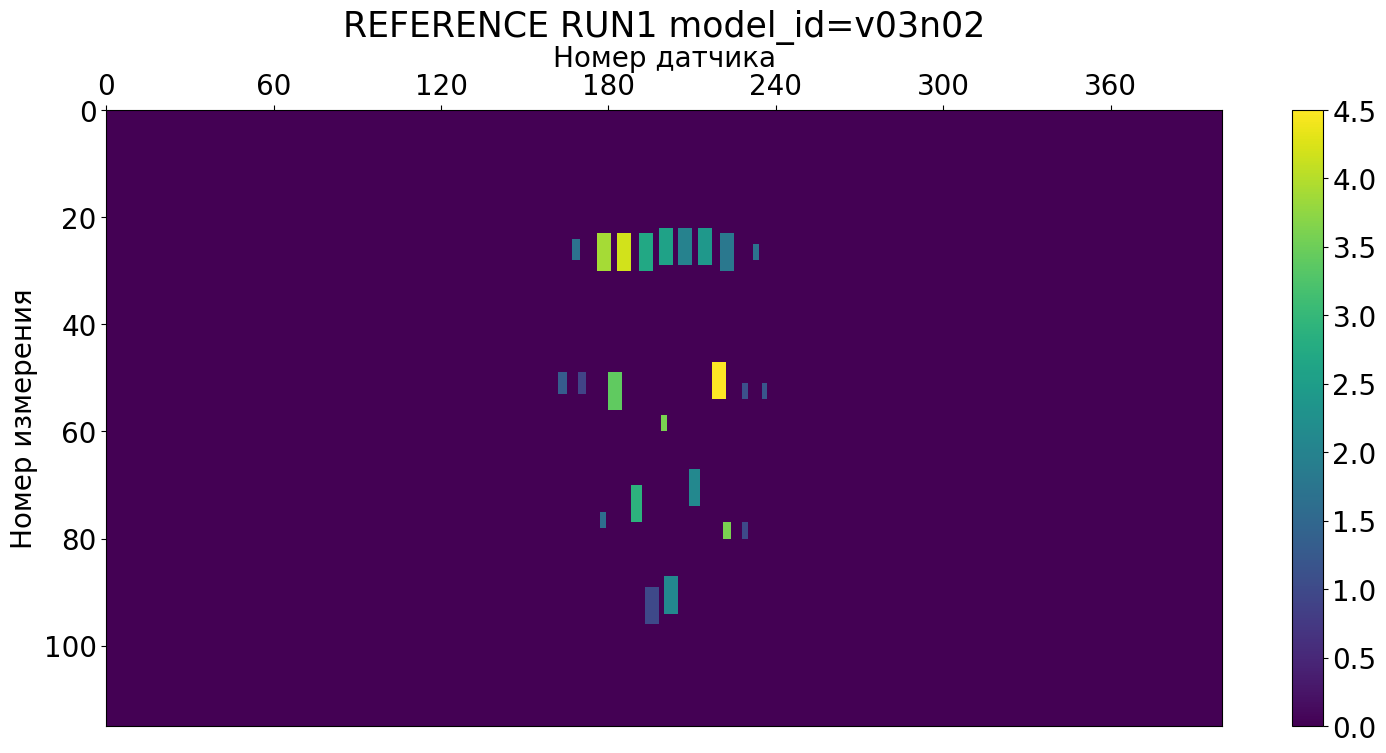

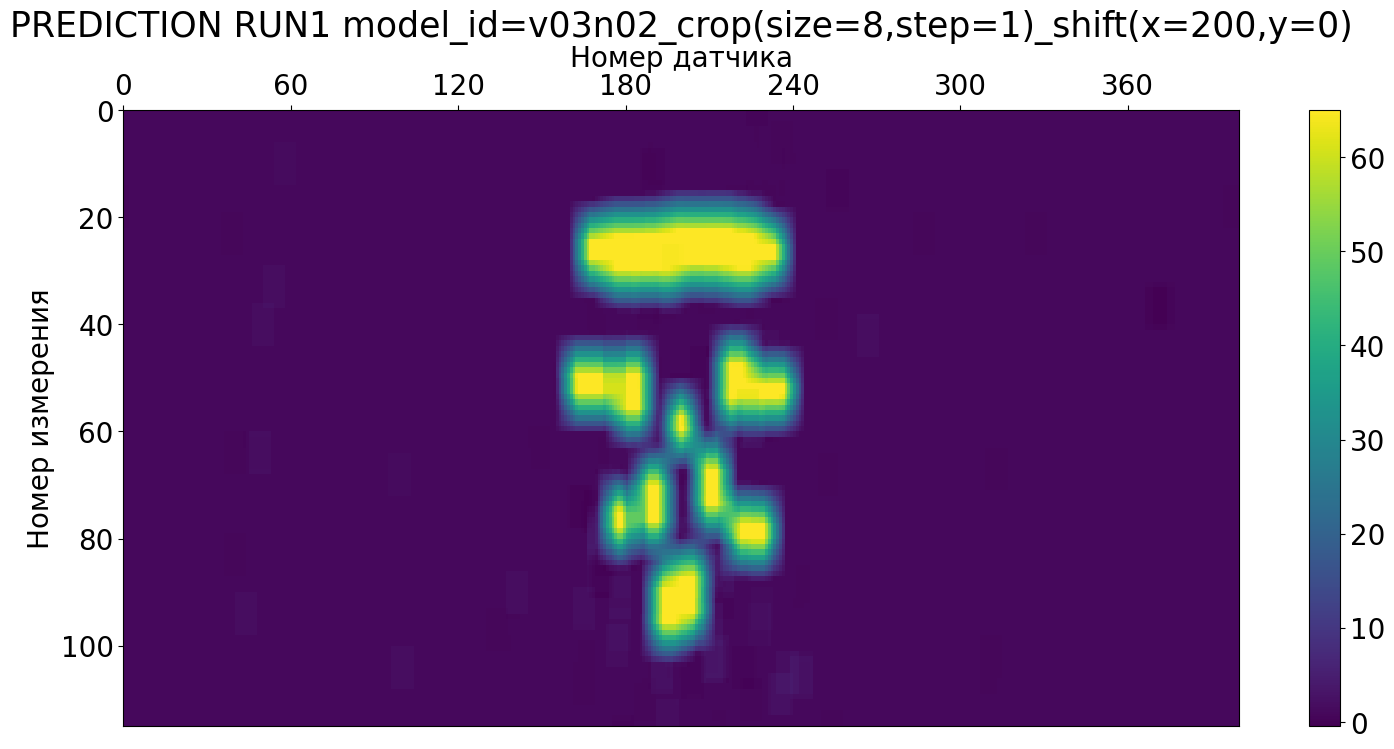

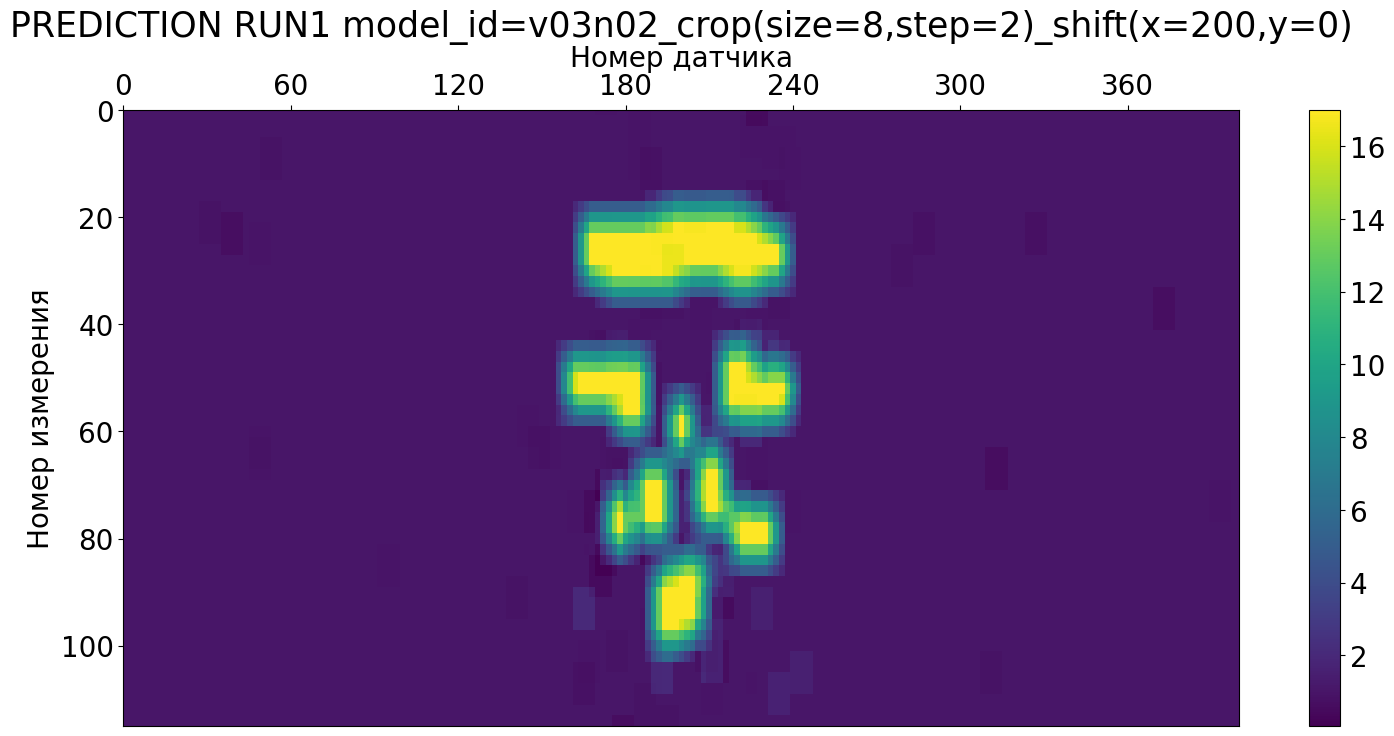

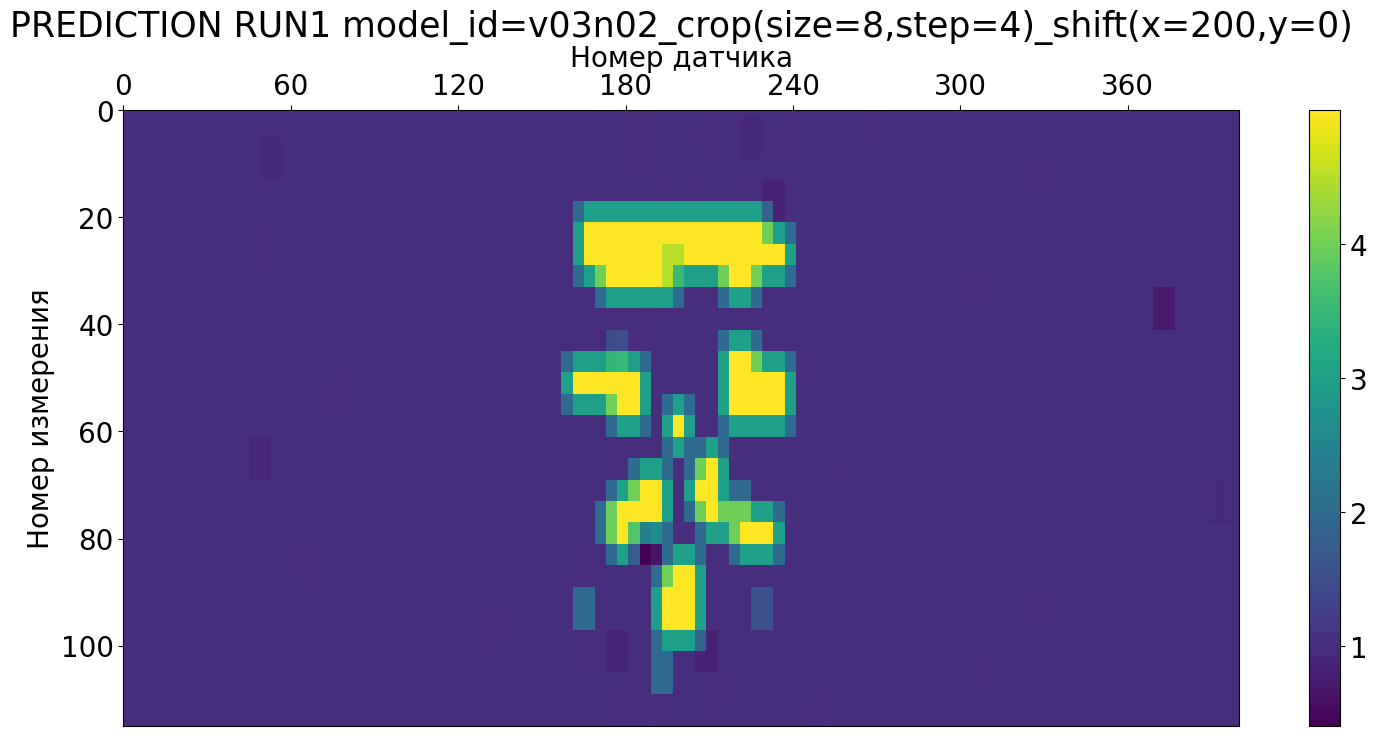

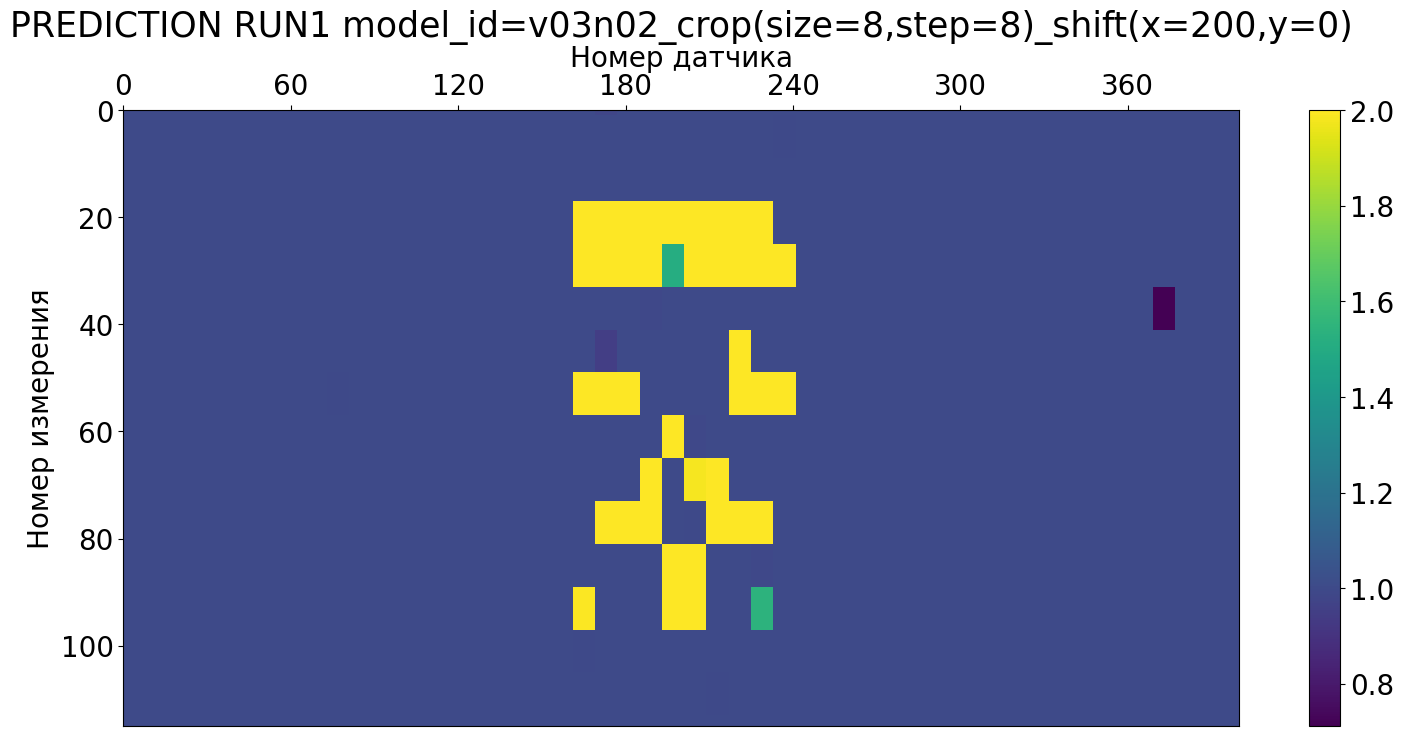

In [3]:
for name, defect_map in df_dict.items():
    fig, ax = plt.subplots()

    fig.set_figwidth(18)
    fig.set_figheight(8)
    fig.patch.set_alpha(0.0)

    ax.invert_yaxis()
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')
    ax.set_title(name, fontsize=25)
    ax.set_xlabel('Номер датчика', fontsize=20)
    ax.set_ylabel('Номер измерения', fontsize=20)
    ax.tick_params(axis='both', labelsize = 20)

    map = ax.pcolormesh(defect_map)
    cbar = fig.colorbar(map)
    cbar.ax.tick_params(labelsize=20)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(60))

    #plt.show()
    plt.savefig(f'images/model_v{MODEL_VER}n{MODEL_NUM}/'+name+'.jpg', bbox_inches='tight')

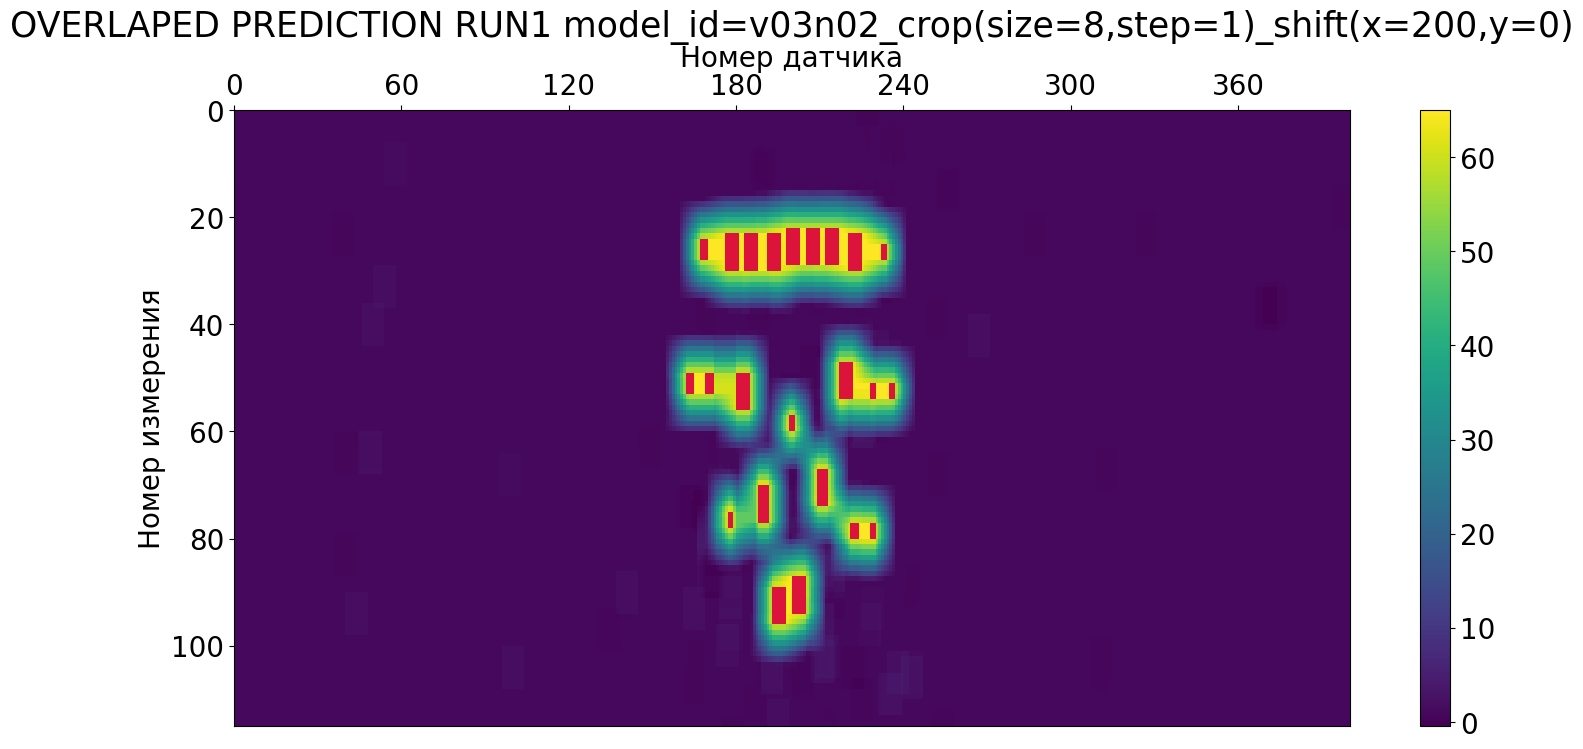

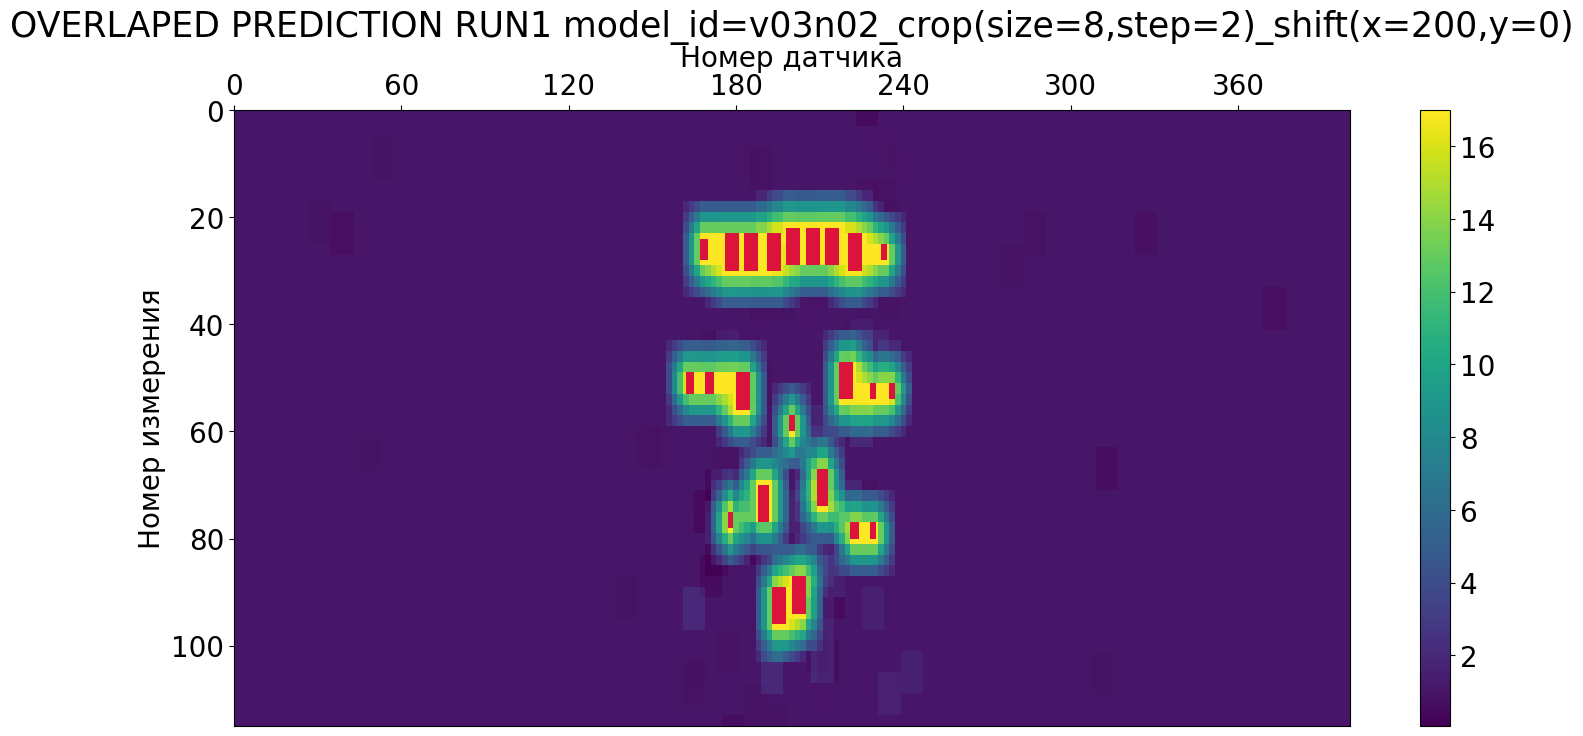

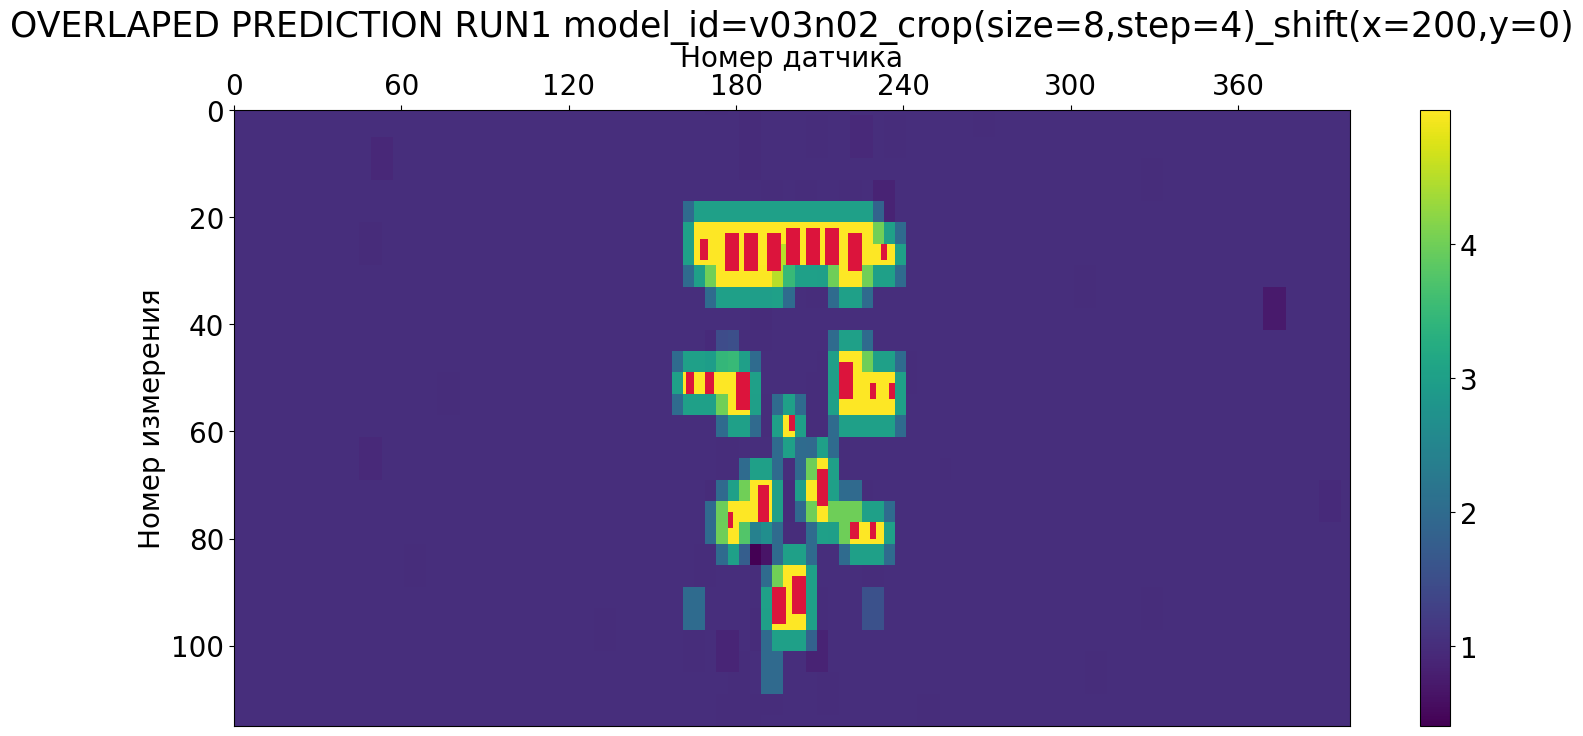

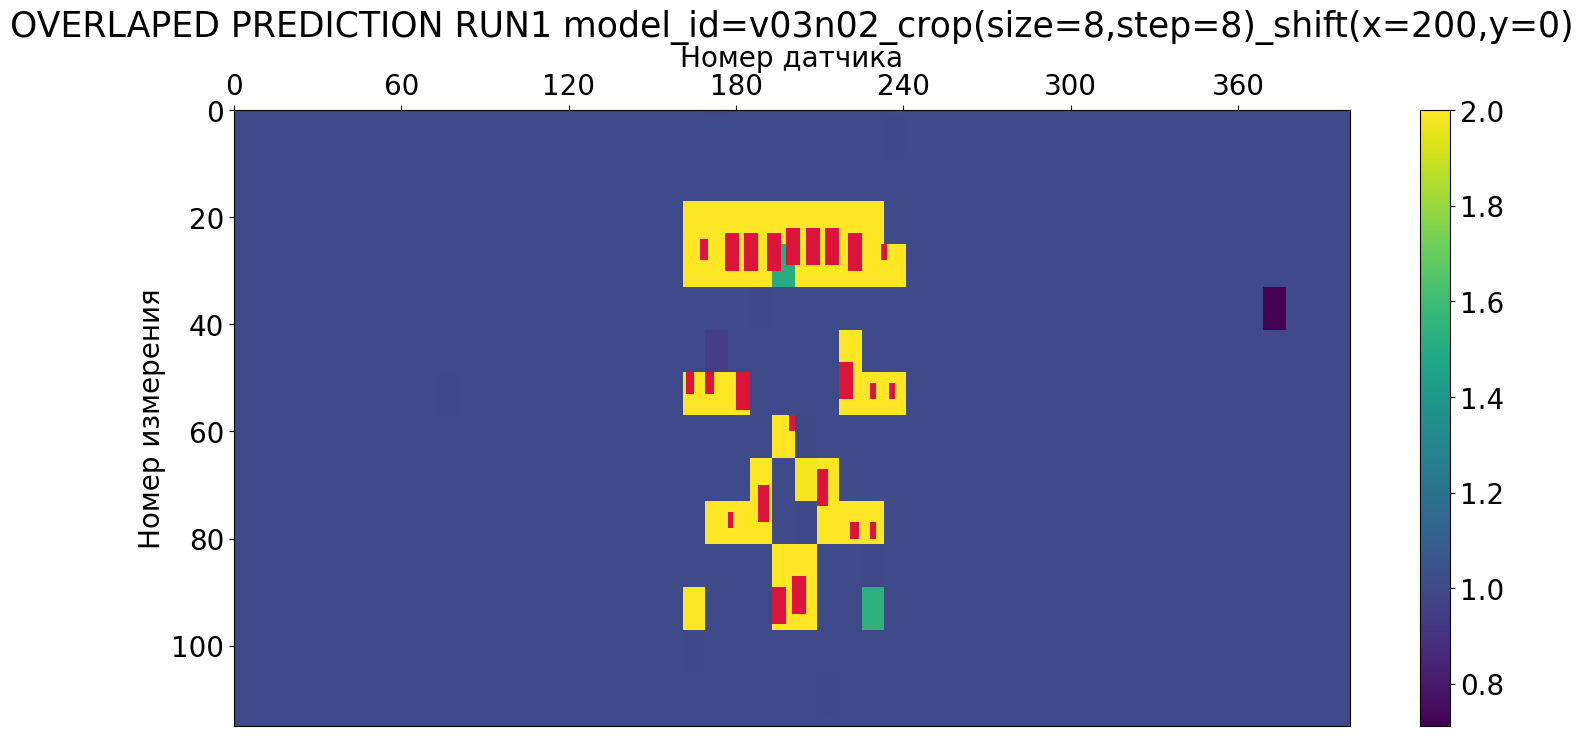

In [4]:
ref_arr = None
ref_name = None
for name, defect_map in df_dict.items():
    if re.match('(REFERENCE).*', name):
        ref_arr = defect_map.to_numpy()
        ref_name = name

for name, defect_map in df_dict.items():

    if name == ref_name:
        continue
    fig, ax = plt.subplots()

    fig.set_figwidth(18)
    fig.set_figheight(8)
    fig.patch.set_alpha(0.0)

    ax.invert_yaxis()
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')
    ax.set_title('OVERLAPED '+name, fontsize=25)
    ax.set_xlabel('Номер датчика', fontsize=20)
    ax.set_ylabel('Номер измерения', fontsize=20)
    ax.tick_params(axis='both', labelsize = 20)

    map = ax.pcolormesh(defect_map)
    cbar = fig.colorbar(map)
    cbar.ax.tick_params(labelsize=20)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(60))

    # Get pixel position above the threshold
    Y, X = np.where(ref_arr > 0)
    positions = np.dstack((X, Y))[0]
    
    # Create a rectangle per position and merge them.
    rectangles = [shPolygon([xy, xy + [1, 0], xy + [1, 1], xy + [0, 1]]) for xy in positions]
    polygons = unary_union(rectangles)
    
    # Shapely will return either a Polygon or a MultiPolygon. 
    # Make sure the structure is the same in any case.
    if polygons.geom_type == "Polygon":
        polygons = [polygons]
    else:
        polygons = polygons.geoms
    
    # Add the matplotlib Polygon patches
    for polygon in polygons:
        ax.add_patch(mplPolygon(polygon.exterior.coords, fc='crimson'))
    #plt.show()
    plt.savefig(f'images/model_v{MODEL_VER}n{MODEL_NUM}/'+'OVERLAPED '+name+'.jpg', bbox_inches='tight')